# example 1

In [1]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

In [20]:
in_neurons = 2
hidden_neurons = 300
out_neurons = 2  

In [21]:
model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False, input_shape=(None, in_neurons)))
model.add(Dense(out_neurons, input_dim=hidden_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 300)               363600    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 602       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 364,202.0
Trainable params: 364,202.0
Non-trainable params: 0.0
_________________________________________________________________


In [5]:
import pandas as pd  
from random import random

In [22]:
flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise
data.head()

,a,b
10,5.307613,1.179469
11,4.717878,1.769204
12,4.128143,2.358939
13,3.538408,2.948674
14,2.948674,3.538408


In [ ]:
flow = (list(range(1,10,1)) + list(range(10,1,-1)))*1000  
pdata = pd.DataFrame({"a":flow, "b":flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] * random()  # some noise
data.head()

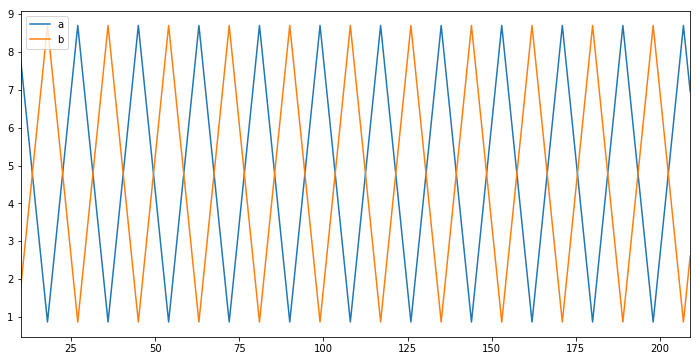

In [16]:
data[:200].plot()

In [31]:
import numpy as np

def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [32]:
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [36]:
model.fit(X_train, y_train, batch_size=500, epochs=3, validation_split=0.1)

Train on 14481 samples, validate on 1610 samples
Epoch 1/3
14481/14481 [==============================] - 286s - loss: 0.0349 - val_loss: 0.0336
Epoch 2/3
14481/14481 [==============================] - 286s - loss: 0.0300 - val_loss: 0.0282
Epoch 3/3
14481/14481 [==============================] - 288s - loss: 0.0255 - val_loss: 0.0210


In [37]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
rmse

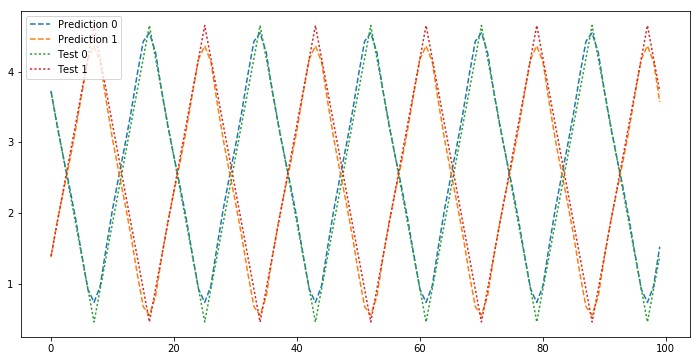

In [38]:
plt.plot(predicted[:100][:,0],"--")
plt.plot(predicted[:100][:,1],"--")
plt.plot(y_test[:100][:,0],":")
plt.plot(y_test[:100][:,1],":")
plt.legend(["Prediction 0", "Prediction 1", "Test 0", "Test 1"])

# example 2

In [2]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

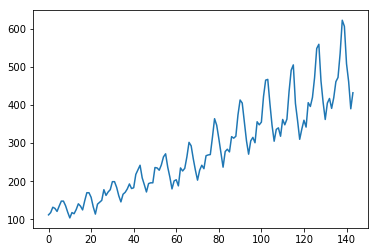

In [16]:
dataset = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [8]:
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [15]:
# load the dataset
dataset.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [17]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
dataset[:10]

array([[ 0.01544402],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853],
       [ 0.05984556],
       [ 0.08494208],
       [ 0.08494208],
       [ 0.06177606],
       [ 0.02895753]])

In [21]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100 44


In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

```bash
X		Y
112		118
118		132
132		129
129		121
121		135
```

In [25]:
trainX.shape

(98, 1)

In [27]:
trainY.shape

(98,)

In [28]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
trainX.shape

(98, 1, 1)

In [32]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=1)

Epoch 1/100
98/98 [==============================] - 0s - loss: 0.0300     
Epoch 2/100
98/98 [==============================] - 0s - loss: 0.0136     
Epoch 3/100
98/98 [==============================] - 0s - loss: 0.0112     
Epoch 4/100
98/98 [==============================] - 0s - loss: 0.0102     
Epoch 5/100
98/98 [==============================] - 0s - loss: 0.0092     
Epoch 6/100
98/98 [==============================] - 0s - loss: 0.0083     
Epoch 7/100
98/98 [==============================] - 0s - loss: 0.0074     
Epoch 8/100
98/98 [==============================] - 0s - loss: 0.0066     
Epoch 9/100
98/98 [==============================] - 0s - loss: 0.0057     
Epoch 10/100
98/98 [==============================] - 0s - loss: 0.0051     
Epoch 11/100
98/98 [==============================] - 0s - loss: 0.0043     
Epoch 12/100
98/98 [==============================] - 0s - loss: 0.0037     
Epoch 13/100
98/98 [==============================] - 0s - loss: 0.0032     
Epoch 14

In [33]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.33 RMSE
Test Score: 52.42 RMSE


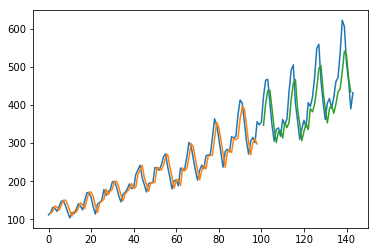

In [34]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()